Advanced Actor-Critic algorithm-based Antenna Selection Scheme for MIMO Systems
--
* Actor-Critic (policy-based)

INSTALL & IMPORT
--

In [ ]:
# FOR BASIC
!pip install tensorflow==2.3.0
!pip install gym
!pip install keras
!pip install keras-rl2
!pip install stable-baselines3 pyglet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320.4 MB 45 kB/s 
     |████████████████████████████████| 2.9 MB 26.8 MB/s 
     |████████████████████████████████| 459 kB 43.5 MB/s 
     |████████████████████████████████| 20.1 MB 40.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 778 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177 kB 9.5 MB/s 
     |████████████████████████████████| 1.5 MB 68.8 MB/s 
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616824 sha256=8c472c31263fedd385dd905570d5777af60bbb64d4b45c15fac59bc0c46ace87
  Stored in directory: /root/.cache/pip/wheels/76/ee/9c/36bfe3e079df99acf5ae57f4e3464ff2771b34447d6d2f2148
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3:
      Successfully uninstalled gym-0.17.3
Looking in in

In [ ]:
import gym
import math
import cmath
import random
import itertools
import tensorflow
import numpy as np
from gym import Env
import pandas as pd
from sys import version
from matplotlib import cm
from gym.utils import seeding
from scipy.constants import *
from matplotlib import colors
from rl.agents import DQNAgent

import matplotlib.pyplot as plt

# GET TIMES NEW ROMAN FONT
# REPLACE DEFULAT FONT TO TIMES NEW ROMAN
import matplotlib.patches as mpatches
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

from gym.spaces import Discrete, Box
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory
from mpl_toolkits.mplot3d import Axes3D
from gym import Env, error, spaces, utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Input

import sys
import time
import pylab
from collections import deque
from tensorflow.keras.models import Sequential, Model
import threading
import tensorflow as tf
from tensorflow.keras import backend as K

# PLAY AN AUDIO BEEP SOUND, ANY AUDIO URL WILL DO
from google.colab import output

# FOR COUNT HIGHEST CAPACITY MODE (최빈값)
from collections import Counter

# For reinforcement reward plot
# FOR REINFORCEMENT LEARNING REWARD PLOTTING
from rl_plotter.logger import Logger

# FOR SHELL COMMAND
from kora import console
console.start() 

# GET MODE CAPACITY FUNCTION 
def get_capacity(numbers):
  if len(numbers) == 0:
    return 0
  else:
    c = Counter(numbers)
    mode = c.most_common(1)
    return mode[0][0]

# ================================ 8 * 8 MIMO NOTE ================================
# reward = 1 or 0
# Ns(1) = 8 (max_score) / action 8 /  sub : 4, opti : 8 /.... 6
# Ns(2) = 28 (max_score) / action 28 /  sub : 14, opti : 28/... 21
# Ns(3) = 56 (max_score) / action 56 /  sub : 28, opti : 56/... 42
# Ns (4) = 70 (max_score) / action 70 /  sub : 35, opti : 70/... 52
# Ns (5) = 56 (max_score) / action 56 /  sub : 28, opti : 56/... 42
# Ns (6) = 28 (max_score) / action 28 /  sub : 14, opti : 28/... 21
# Ns(7) =  8 (max_score) / action 8 /  sub : 4, opti : 8 /.... 6
# Ns(8) =  1 (max_score) / action 1 /  sub : 0, opti : 1 /.... 0.5
# Therefore, 8 * 8 MIMO Threshold = [6, 21, 42, 52, 42, 21, 6, 0.5]


# ================================ 16 * 16 MIMO NOTE ================================
# reward = 1 or 0
# Ns(1) = 16 (max_score) / action 16 /  sub : 8, opti : 16 /.... 12
# Ns(2) = 120 (max_score) / action 120 /  sub : 60, opti : 120/... 90
# Ns(3) = 560 (max_score) / action 560 /  sub : 280, opti : 560/... 420
# Ns (4) = 1820 (max_score) / action 1820 /  sub : 910, opti : 1820/... 1365
# Ns (5) = 4368 (max_score) / action 4368 /  sub : 2184, opti : 4368/... 3276
# Ns (6) = 8088 (max_score) / action 8088 /  sub : 4044, opti : 8088/... 6066
# Ns(7) =  11440 (max_score) / action 11440 /  sub : 5720, opti : 11440 /.... 8580
# Ns(8) =  12870 (max_score) / action 12870 /  sub : 6435, opti : 12870 /.... 9652
# Ns(9) = 11440 (max_score) / action 11440 /  sub : 5720, opti : 11440 /.... 8580
# Ns(10) = 8088 (max_score) / action 8088 /  sub : 4044, opti : 8088/... 6066
# Ns(11) = 4368 (max_score) / action 4368 /  sub : 2184, opti : 4368/... 3276
# Ns (12) = 1820 (max_score) / action 1820 /  sub : 910, opti : 1820/... 1365
# Ns (13) = 560 (max_score) / action 560 /  sub : 280, opti : 560/... 420
# Ns (14) = 120 (max_score) / action 120 /  sub : 60, opti : 120/... 90
# Ns (15) = 16 (max_score) / action 16 /  sub : 8, opti : 16/... 12
# Ns (16) = 1 (max_score) / action 1 /  sub : 0, opti : 1/... 0.5
# Therefore, 16 * 16 MIMO Threshold = [12, 90, 420, 1365, 3276, 6066, 8580, 9652, 8580, 6066, 3276, 1365, 420, 90, 12, 0.5]

CUSTOM ENV
--

In [ ]:
# =============================================================================
# CUSTOM ENVIRONMENT : SMALL MIMO SYSTEMS SUCH AS 8X8, 16X16 MIMO
# =============================================================================

# IN MY CUSTOM ENV NEED TO SNR, AND NUMBER OF SUBSETS.
class CustomEnv(Env):
    def __init__(self, Init_SNR, Subset):
      
      # INITIALIZE MIMO ANTENNAS PARAMETERS
      self.Nt = 16
      self.Nr = 16
      
      # self.Ns = Subset
      self.Ns = 14
      self.full_Nr = np.arange(0, self.Nr)

      # STEP COUNTING 
      self.count = 0

      # GET RANDOM SEED
      self.seed()

      # INITIALIZE SNR VALUE, AND WHICH THE SNR CONVERTED LINEAR VALUE
      self.init_SNR = Init_SNR
      self.SNR = 10 ** (self.init_SNR / 10)

      # GENERATE CAHNNEL MATRIX
      self.H = np.sqrt(0.5) * np.random.randn(self.Nr,self.Nt) + 1j * np.random.randn(self.Nr,self.Nt)

      # SET ACTION SPACE WHICH THE SPACE IS ALL POSSIBLE ANTENNA SUBSET COMBINATION
      self.action_values = Action_Space_Mapping(self.full_Nr, self.Ns)
      self.num_actions = len(self.action_values.keys())
      self.action_space = spaces.Discrete(self.num_actions)

      # SET OBSERVATION SPACE, WHICH THE SPACE IS 0 TO 100
      self.observation_space = Box(low=np.array([0]), high=np.array([100]))

      # GENERATE RANDOM SEED
      def seed(self, seed = None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

      # INITIALIZE STATE (CURRENTLY CAPACITY)
      self.state = None
      self.previous_state = None
      self.min_state = 0
      self.max_state = None
      self.capacity_list = []
      self.action_length = self.num_actions

    def step(self, action):
      assert self.action_space.contains(action), "%r (%s) invalid" % (action, type(action))

      # GENERATE SELECTED CHANNEL MATRIX BY USING ACTIONS, WHICH THE ACTION IS ALL POSSIBLE ANTENNA SUBSETS
      self.H_sel = self.H[np.array(self.action_values[action]).flatten(),:]

      # CALCUATE SELECTED CHANNEL CAPACITY
      self.capacity = math.floor(abs(np.log2(np.linalg.det(np.eye(self.Nt) + self.SNR / self.Nt * np.matmul(np.transpose(self.H_sel),self.H_sel)))))

      # GET CUREENTLY CAPCAITY VALUES (TYPE : INT)
      self.capacity_list.append(self.capacity)

      # GET MAXIMUM CAPACITY 
      self.best_capacity = np.max(self.capacity_list)

      # GET CURRENTLY CHANNEL CAPACITY (CURRETLY STATE)
      self.state = self.capacity

      # GET MAXIMUM CAHNNEL CAPACITY (MAX STATE)
      self.max_state = self.best_capacity

      # GET PREVIOUS CHANNEL CAPACITY
      if (len(self.capacity_list) < 2):
        self.previous_state = self.capacity_list[-1]
      else:
        self.previous_state = self.capacity_list[-2]

      # REDUCE ACTION LENGTH
      self.action_length -= 1 

      # INCREASING STEP COUNT
      self.count += 1

      # ONLY POSITIVE REWARD POLICY
      if (self.state >= self.max_state):
        reward = 1
      else:
        reward = 0

      # DROP THE PREVIOUS REWARD POLICY 1st (REWARD)
      """
      if (self.state >= self.max_state):
        reward = 10
      elif (self.state > self.previous_state and self.state < self.max_state): 
        reward = 5
      else:
        reward = 0
      """

      # DROP THE PREVIOUS REWARD POLICY 2nd (REWARD & PENALTY)
      """
      # reward = 10 * np.exp((self.state - self.max_state) / 10)
      # [1] Currently state smaller than previous state case
      if (self.state < self.previous_state):
        reward = -10
        # print("Worst: {0}, Actions: {1}, steps: {2}".format(self.state, self.action_values[action], self.count))

      # [2] Currently state same an previous state case
      elif (self.state == self.previous_state):
        reward = -5
        # print("Not enough: {0}, Actions: {1}, steps: {2}".format(self.state, self.action_values[action], self.count))

      # [3] Currently state better than previous, but less than maximum state
      elif (self.state > self.previous_state and self.state < self.max_state):
        reward = 5
        # print("Enough: {0}, Actions: {1}, steps: {2}".format(self.state, self.action_values[action], self.count))

      # [4] Currently state better than maximum state
      elif (self.state >= self.max_state):
        reward = 10
        # print("Best: {0}, Actions: {1}, steps: {2}".format(self.state, self.action_values[action], self.count))
      """

      # CHECK FINISH ACTION
      if self.action_length <= 0: 
        done = True
      else:
        done = False
        
      info = {}
        
      # RETURN STEP INFORMATION
      return self.state, reward, done, info
    
    # RESET FUNCTION
    def reset(self):
      self.state = 0
      self.previous_state = 0
      self.max_state = 0
      self.count = 0
      self.action_length = self.num_actions
      return self.state

    # RENDER FUNCTION
    def render(self, mode='human', close=False):
      pass

    # RETURN ACTION VALUES
    def action_value(self, action):
      return self.action_values[action]

# MAPPING A ACTION SPACE FUNCTION (KEY & ACTION)
# WHERE 'ACTION' MEANS THAT POSSIBLE ALL SUBSET COMBINATION
def Action_Space_Mapping(full_Nr, Ns):
    action_val_tuples = list(itertools.combinations(full_Nr, Ns))    
    action_key_list = list(np.arange(len(action_val_tuples)))
    action_values = dict(zip(action_key_list,action_val_tuples))
    return action_values

A2C
--

In [ ]:
# =============================================================================
# DEEP REINFORCEMNT LEARNING : ADVANCED ACTOR-CRITIC ALGORITHM (A2C)
# =============================================================================

# A2C(Advantage Actor-Critic) AGENT FOR CUSTOM ENV
class A2CAgent:
    def __init__(self, state_size, action_size):

        self.load_model = False

        # GET SIZE OF STATE AND ACTION
        self.state_size = state_size
        self.action_size = action_size
        self.value_size = 1

        # THESE ARE HYPER-PARAMETERS FOR THE POLICY GRADIENT
        self.discount_factor = 0.99
        self.actor_lr = 1e-3
        self.critic_lr = 5e-3

        # CREATE MODLE FOR POLICY NETWORK
        self.actor = self.build_actor()
        self.critic = self.build_critic()

        if self.load_model:
          self.actor.load_weights("A2C_actor_weights.h5f")
          self.critic.load_weights("A2C_critic_weights.h5f")

    # APPROXIMATE POLICY AND VALUE USING NUERAL ENTWORK
    # ACTOR : STATE IS INPUT AND PROBABILITY OF EACH ACTION IS OUTPUT OF MODEL
    # CRITIC : STATE IS INPUT AND VALUE OF STATE IS OUTPUT OF MODEL
    def build_actor(self):
        actor = Sequential()
        actor.add(Dense(24, input_dim=self.state_size, activation='relu', kernel_initializer='glorot_uniform'))
        actor.add(Dense(24, activation='relu', kernel_initializer='glorot_uniform'))
        actor.add(Dense(self.action_size, activation='softmax', kernel_initializer='glorot_uniform'))

        # SEE NOTE REGARDING CORESSENTROPY IN POLICY GRADIENT METHOD CELL
        actor.compile(loss='categorical_crossentropy', optimizer=Adam(lr=self.actor_lr))
        return actor

    def build_critic(self):
        critic = Sequential()
        critic.add(Dense(24, input_dim=self.state_size, activation='relu', kernel_initializer='he_uniform'))
        critic.add(Dense(24, activation='relu', kernel_initializer='he_uniform'))
        critic.add(Dense(1, activation='linear', kernel_initializer='he_uniform'))

        critic.compile(loss="mse", optimizer=Adam(lr=self.critic_lr))
        return critic

    # USING THE OUTPUT OF POLICY NETWORK, PICK ACTION STOCHASTICALLY
    def get_action(self, state):
        policy = self.actor.predict(state, batch_size=1).flatten()
        return np.random.choice(self.action_size, 1, p=policy)[0]

    # UPDATE POLICY NETWORK EVERY EPISODE
    def train_model(self, state, action, reward, next_state, done):
        target = np.zeros((1, self.value_size))
        advantages = np.zeros((1, self.action_size))

        value = self.critic.predict(state)[0]
        next_value = self.critic.predict(next_state)[0]

        if done:
            advantages[0][action] = reward - value
            target[0][0] = reward
        else:
            advantages[0][action] = reward + self.discount_factor * (next_value) - value
            target[0][0] = reward + self.discount_factor * next_value

        self.actor.fit(state, advantages, epochs=1, verbose=0)
        self.critic.fit(state, target, epochs=1, verbose=0)

/usr/local/lib/python3.7/dist-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float32
  "Box bound precision lowered by casting to {}".format(self.dtype)


episode: 0   score: 65
episode: 1   score: 3
episode: 2   score: 2
episode: 3   score: 68
episode: 4   score: 119
episode: 5   score: 118
episode: 6   score: 119
episode: 7   score: 119
episode: 8   score: 119
episode: 9   score: 119
episode: 10   score: 119
episode: 11   score: 119
episode: 12   score: 118
episode: 13   score: 119
episode: 14   score: 119
episode: 15   score: 120
episode: 16   score: 118
episode: 17   score: 119
episode: 18   score: 118
episode: 19   score: 120
episode: 20   score: 119
episode: 21   score: 119
episode: 22   score: 119
episode: 23   score: 119
episode: 24   score: 119
episode: 25   score: 119
episode: 26   score: 119
episode: 27   score: 119
episode: 28   score: 118
episode: 29   score: 119
episode: 30   score: 119
episode: 31   score: 119
episode: 32   score: 119
episode: 33   score: 120
episode: 34   score: 119
episode: 35   score: 119
episode: 36   score: 119
episode: 37   score: 120
episode: 38   score: 119
episode: 39   score: 119
episode: 40   sc

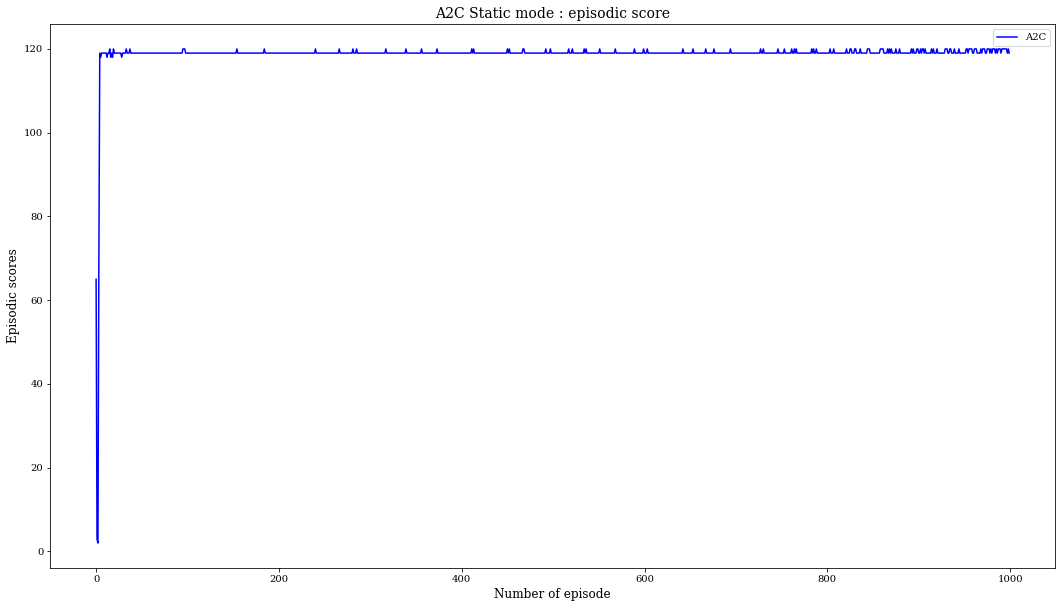

In [ ]:
# ============================== SYSTEM PARA ===================================
# THRESHOLD IS CALCUATED SUB-OPTIMAL BETWEEN OPTIMAL SCORE
# SUBSETS CHANGE THE SIZE OF THE ACTION SPACE

# 8X8 MIMO Threshold
# Threshold =  [6, 21, 42, 52, 42, 21, 6, 0.5]

# 16X16 MIMO Threshold
Threshold = [12, 90, 420, 1365, 3276, 6066, 8580, 9652, 8580, 6066, 3276, 1365, 420, 90, 12, 0.5]

EPISODES = 1000

# GET MY CUSTOM ENV (SNR, SUBSET)
env = CustomEnv(Init_SNR = 10, Subset = 14)

if __name__ == "__main__":

  # GET STATE, ACTION SIZE OF CUSTOM ENV.
  state_size = env.observation_space.shape[0]
  action_size = env.action_space.n

  # CREATE A2C AGENT (ADVANCED ACTOR-CRITIC)
  agent = A2CAgent(state_size, action_size)

  # INITIAL SCORES, EPIOSDES, CAPACITYS
  scores, episodes, capacitys = [], [], []

  for e in range(EPISODES):
    done = False
    score = 0
    state = env.reset()
    state = np.reshape(state, [1, state_size])

    # SELECT AN ACTION FROM THE CURRENT STATE AND PROCEED ON STEP
    while not done:
      action = agent.get_action(state)
      next_state, reward, done, info = env.step(action)
      next_state = np.reshape(next_state, [1, state_size])
      agent.train_model(state, action, reward, next_state, done)

      score += reward
      state = next_state

      if done:
        scores.append(score)
        episodes.append(e)

        print("episode:", e, "  score:", score)

        # STORE SCORE, IF THE AVERAGE OF THE LAST 20 EPISODES IS ABOVE THE THRESHOLD
        if np.mean(scores[-min(20, len(scores)):]) > Threshold[env.Ns-1]:
          capacitys.append(env.state)
          # sys.exit()

      # SAVE THE MODEL
      if e % 50 == 0: 
        agent.actor.save_weights("A2C_actor_weights.h5f")
        agent.critic.save_weights("A2C_critic_weights.h5f")
        agent.actor.save('A2C_actor_model.h5')
        agent.critic.save('A2C_critic_model.h5')

    # GET MODE OF SELECTED CAPACITY
    best_capacity = get_capacity(capacitys)

  # PLOT THE SOCRE ACCORDING TO THE EPISODE
  plt.figure(figsize=(18,10))
  pylab.plot(episodes, scores, 'b')
  plt.xlabel('Number of episode', fontsize = 12)
  plt.ylabel('Episodic scores', fontsize = 12)
  plt.title('A2C : episodic score', fontsize = 14)
  plt.legend(['A2C'])
  plt.savefig('A2C.tif', dpi=600)

  # EXPORT POLICY GRAIDENT-METHOD RESULT (EPISODE | SCORE)
  dataframe = pd.DataFrame({'Episode' : episodes, 'Score' : scores})
  dataframe.to_csv('A2C.csv', index = False, header=['Episode', 'Score'])